## Cine Full Treatment Analysis

In this script, the target centroid positions from all minutes are imported. They are then time averaged and displayed.

Next the target centroid's y velocity is calculated and the fourier transform of this is taken. 

When the patient is in steady state breathing, the fourier transform will display a large peak in the breathing frequency range.

The state of breath hold is defined by the fractional area under the fourier transform of the centroid y velocity, and when this is below a threshold value.

The states of breath-hold can thus be separated and smoothed to analysis breath-hold stability.

In [3]:
import pickle

import matplotlib.pyplot as plt

import numpy as np


%matplotlib notebook



### Need to do  12

In [4]:
cine_video_name = 'pat_10_frac_5.ogv'



with open('Cine Pickles/' + cine_video_name + '/cine_res.pickle', 'rb') as handle:
    cine_res = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/cine_fps.pickle', 'rb') as handle:
    cine_fps = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/MR_res.pickle', 'rb') as handle:
    MR_res = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/MR_pixel.pickle', 'rb') as handle:
    MR_pixel = pickle.load(handle)
    
    
print(MR_res)



with open('Cine Pickles/' + cine_video_name + '/number_of_minutes.pickle', 'rb') as handle:
    number_of_minutes = pickle.load(handle)
    
    
print(number_of_minutes)

112
9


#### Import Centroid positions from all frames

It is important to have both Total_Frames_Centroids_Original and Total_Frames_Centroids. Outliers are removed from Total_Frames_Centroids and then this is used for calculating the fourier transform etc. 

When the breath-hold time periods are found, it is important these outliers are included so the times line up correctly.

In [5]:
Total_Frames_Centroids_Original = []

Total_Areas = []

total_no_of_frames = 0


for minute_number in np.arange(1, number_of_minutes + 2, 2 , dtype = 'int'):
    
    with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) +'/Frames_Centroids.pickle', 'rb') as handle:
        Frames_Centroids = pickle.load(handle)
        
    Total_Frames_Centroids_Original += list(Frames_Centroids)
    
    with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) +'/Areas.pickle', 'rb') as handle:
        Areas = pickle.load(handle)
        
    Total_Areas += list(Areas)
    
    with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) +'/no_of_frames.pickle', 'rb') as handle:
        no_of_frames = pickle.load(handle)
        
    total_no_of_frames += no_of_frames
    
    
Total_Frames_Centroids_Original = np.array(Total_Frames_Centroids_Original)

Total_Areas_Original = np.array(Total_Areas)

Total_Areas = Total_Areas_Original

Total_Frames_Centroids = Total_Frames_Centroids_Original
    
frame_nums = np.arange(0, total_no_of_frames, 1)  


with open('Cine Pickles/' + cine_video_name + '/frame_nums.pickle', 'wb') as handle:
    pickle.dump(frame_nums, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Cine Pickles/' + cine_video_name + '/Total_Frames_Centroids_Original.pickle', 'wb') as handle:
    pickle.dump(Total_Frames_Centroids_Original, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Cine Pickles/' + cine_video_name + '/Total_Areas_Original.pickle', 'wb') as handle:
    pickle.dump(Total_Areas_Original, handle, protocol=pickle.HIGHEST_PROTOCOL)
    


#### Plot these, look for outliers and remove them



<IPython.core.display.Javascript object>


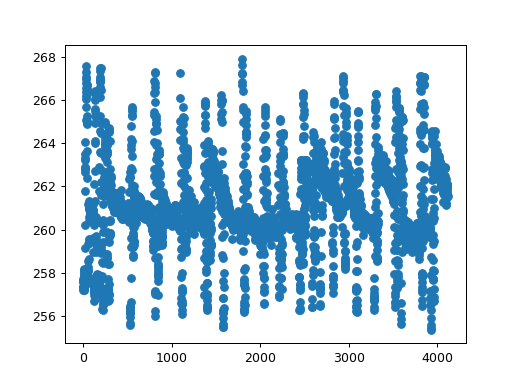

<IPython.core.display.Javascript object>


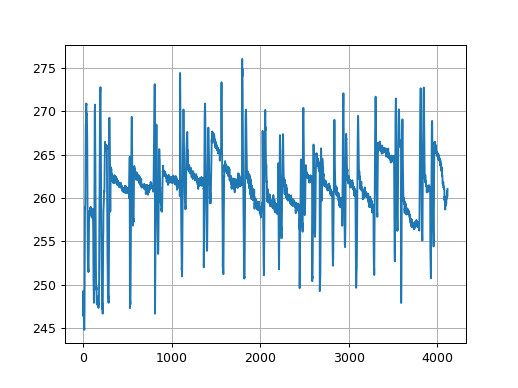

<IPython.core.display.Javascript object>


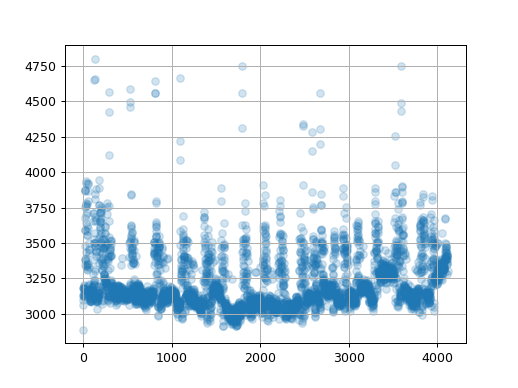

In [6]:
plt.figure()

plt.scatter( frame_nums ,Total_Frames_Centroids[:,0])


plt.figure()

plt.grid()

plt.plot( frame_nums ,Total_Frames_Centroids[:,1])


plt.figure()

plt.grid()

plt.scatter( frame_nums, Total_Areas, alpha = 0.2)

#plt.plot( Total_Areas, alpha = 0.2)

#### Removing Outliers

Look for points visually, categorise these and then remove them using pop()

In [7]:
with open('Cine Pickles/' + cine_video_name + '/error_frames_total.pickle', 'rb') as handle:
    error_frames = pickle.load(handle)

In [8]:
print(error_frames)

[3, 4, 5, 10, 22, 35, 133, 134, 138, 147, 210, 280, 531, 532, 814, 817, 818, 819, 821, 822, 826, 1799, 1807, 1817, 1963, 2062, 2213, 2241, 2242, 2687, 2936, 3296, 3591, 3608]


In [9]:
i = 0


for remove_index in error_frames:
    



    Total_Frames_Centroids = list(Total_Frames_Centroids)

    Total_Frames_Centroids.pop(remove_index + i)

    Total_Frames_Centroids = np.array(Total_Frames_Centroids)


    Total_Areas = list(Total_Areas)

    Total_Areas.pop(remove_index + i)

    Total_Areas = np.array(Total_Areas)




    frame_nums = list(frame_nums)

    frame_nums.pop(remove_index + i)

    frame_nums = np.array(frame_nums)
    
    
    i += -1


    

In [10]:
# ## find outlier points

# outliers = np.where(Total_Frames_Centroids[:,0] < 236)

# outliers = np.where(Total_Areas < 6)

# print(outliers[0][0])

In [11]:
# #remove outlier points

# remove_index = outliers[0][0]

# #remove_index = 33

# Total_Frames_Centroids = list(Total_Frames_Centroids)

# Total_Frames_Centroids.pop(remove_index)

# Total_Frames_Centroids = np.array(Total_Frames_Centroids)


# Total_Areas = list(Total_Areas)

# Total_Areas.pop(remove_index)

# Total_Areas = np.array(Total_Areas)




# frame_nums = list(frame_nums)

# frame_nums.pop(remove_index)

# frame_nums = np.array(frame_nums)


# #number_of_outliers += 1



# #### replot grahs above to check

#### Taking time averages of centroid components

Take a moving average over 1 sec (8 points) of the centroid position components.

In [12]:
centroid_xs = Total_Frames_Centroids[:,0]

centroid_ys = Total_Frames_Centroids[:,1]

areas = Total_Areas

cine_fps = cine_fps

averaging_time = 1

averaging_range = int(averaging_time*cine_fps)


In [13]:
def moving_average(a, n= averaging_range) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [14]:
#print(np.diff(frame_nums)[0:300]) ## we see removing outliers causes discontinuities in frame number so will mess up the alignment of time later on

In [15]:
centroid_xs_avg = moving_average(centroid_xs)

centroid_ys_avg = moving_average(centroid_ys)

areas_avg = moving_average(areas)


frame_nums_avg = moving_average(frame_nums)


### Relate frame_number to time

time = frame_nums_avg*(1/cine_fps)






<IPython.core.display.Javascript object>


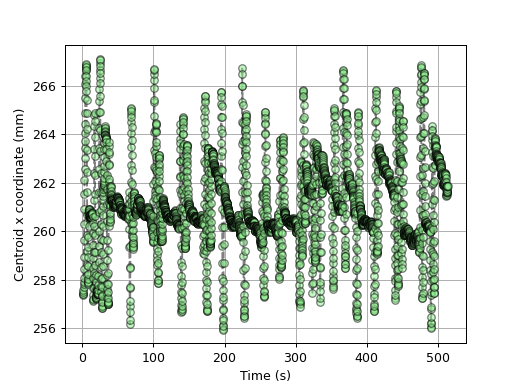

In [16]:
plt.figure()

plt.plot( time , centroid_xs_avg, '--', color = 'black', 
         marker = 'o', markerfacecolor = 'lightgreen', alpha = 0.5)

plt.ylabel('Centroid x coordinate (mm)')
plt.xlabel('Time (s)')
        

plt.grid()

<IPython.core.display.Javascript object>


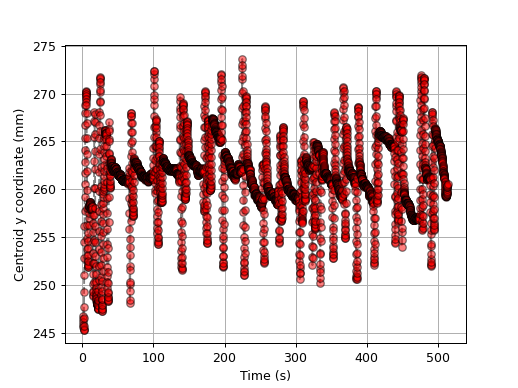

Text(0.5, 0, 'Time (s)')

In [17]:
plt.figure()

plt.grid()



plt.plot( time , centroid_ys_avg, '--', color = 'black', 
         marker = 'o', markerfacecolor = 'red', alpha = 0.5)

plt.ylabel('Centroid y coordinate (mm)')
plt.xlabel('Time (s)')

<IPython.core.display.Javascript object>


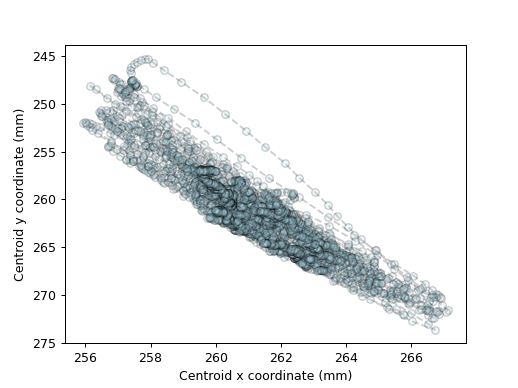

Text(0.5, 0, 'Centroid x coordinate (mm)')

In [18]:
plt.figure()



plt.plot( centroid_xs_avg , centroid_ys_avg, '--', color = 'black', 
         marker = 'o', markerfacecolor = 'lightblue', alpha = 0.2)

plt.gca().invert_yaxis()

plt.ylabel('Centroid y coordinate (mm)')
plt.xlabel('Centroid x coordinate (mm)')
        

<IPython.core.display.Javascript object>


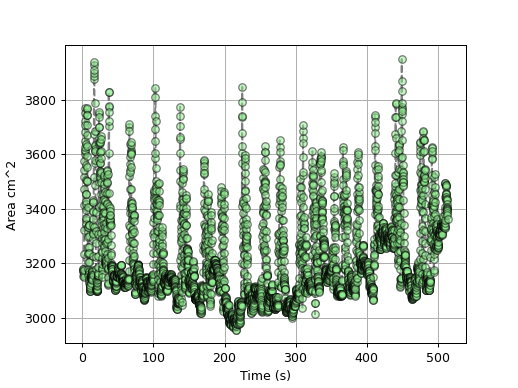

In [19]:
plt.figure()

plt.plot( time , areas_avg , '--', color = 'black', 
         marker = 'o', markerfacecolor = 'lightgreen', alpha = 0.5)

plt.ylabel('Area cm^2')
plt.xlabel('Time (s)')
        

plt.grid()

#### Identifying steady state breathing using fourier transform

Breathing is periodic with frequency in range 0 to 1 Hz. Take a fourier transform of centroid movement speed at different time intervals, and see in which intervals these frequency components are dominant in.

<IPython.core.display.Javascript object>


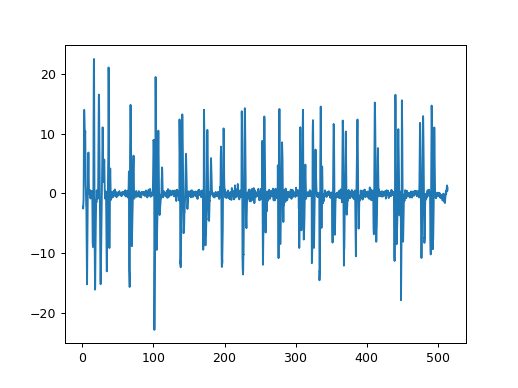

In [20]:
centroid_y_velocity = np.gradient(centroid_ys_avg, 1/cine_fps)


plt.figure()

plt.plot(time, centroid_y_velocity)





In [21]:
from numpy.fft import fft, fftfreq, ifft




time_search_window_length = 8

#this defines the time window length over which each FFT is taken

time_interval = 1/cine_fps

#8fps so points in time space are separated by 1/8 s

max_time = int(np.round(max(time),0))

#works out maximum time of video, to nearest second


# max_breathing_amplitudes = []

times = []

area_fractions = []





for t in np.arange( 10 , max_time - time_search_window_length, time_interval):

    

    

    time_mask = (time > t) & (time < t + time_search_window_length)
    
    ### Set the time range to take fourier transform over
    
    

    #test = 2*np.cos(2*2*np.pi*np.array(time[time_mask]))



    times.append(t)
    
    #stores start of time interval as time in times list


    #### set output frequency domain


    window_length = len(time[time_mask])
    
    #number of sample points in time space in the time window



    sample_spacing = time_interval
    
    #spacing between samples in time space
    

    freqs = fftfreq(window_length, sample_spacing)
    
    #defines a frequency output space given the time window length and sample spacing



    positive_mask  = freqs > 0
    
    
    # find mask for positive frequencies (only considering +ve frequencies)



    ##### Find fast fourier transform of centroids y speed

    x = centroid_y_velocity[time_mask]


    fourier = fft(x, norm = 'ortho')

    #fourier = fft(test, norm = 'ortho')




    ##### define a range of frequencies that correspond to breathing


    breathing_range_mask = (freqs[positive_mask] > 0.1) & (freqs[positive_mask] < 0.8)
    
    

#     ###### Calculating maximum amplitude in breathing range
    

#     max_breathing_amplitude = max( abs((fourier[positive_mask])[breathing_range_mask]))


#     max_breathing_amplitudes.append(max_breathing_amplitude)

#     max_breathing_amplitudes_array = np.array(max_breathing_amplitudes)


    ####### Comparing area in breathing range with total area


    total_area = np.trapz(abs(fourier[positive_mask]), freqs[positive_mask] )

    area = np.trapz(abs(fourier[positive_mask])[breathing_range_mask], freqs[positive_mask][breathing_range_mask] )

    area_fractions.append(area/total_area)


    


<IPython.core.display.Javascript object>


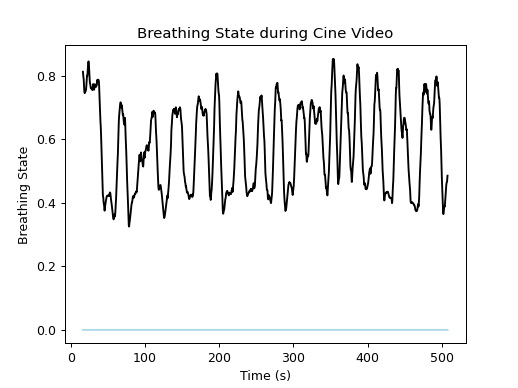

Text(0, 0.5, 'Breathing State')

In [22]:
# Take a moving average of area fractions and times, averaged over 5 seconds

area_fractions_avg = moving_average(area_fractions, 5*cine_fps)


times_avg = moving_average(times, 5*cine_fps)

#I define a breath-hold as when the area under the fourier transform of y velocity graph in the breathing frequency range
#is less the 0.6 (0.59 to be safer) of the total area i.e. when the breathing frequencies aren't dominant



breath_hold_mask = area_fractions_avg < 0

plt.figure()

plt.plot( times_avg + 0.5*time_search_window_length, breath_hold_mask , color = 'lightblue')

plt.plot( times_avg + 0.5*time_search_window_length, area_fractions_avg, color = 'black')



plt.title('Breathing State during Cine Video')

plt.xlabel('Time (s)')

plt.ylabel('Breathing State')


#### Separate periods of breath-hold

Do this by calculating at which frames the breath-hold points occur at, then separating groups of frame numbers

In [23]:

breath_hold_times = np.where(breath_hold_mask == 1)[0]/cine_fps + times_avg[0] + 0.5*time_search_window_length

#print(breath_hold_times)


#this works out the times of breath-hold from the frame number of breath hold 
#( frames have been time averaged over 8 frames so to get real time need to add on the time of frame zero )


breath_hold_frames = np.array((breath_hold_times + 1/(2*cine_fps))*cine_fps , dtype = 'int')


#calculate the corresponding frames by multiplying be cine_fps (note since everything was time averaged by 1 sec (8 frames)
# previously, need to add on half a frame time to the times to get an integer value for frames)


breath_hold_frame_mask =  [frame_num in breath_hold_frames for frame_num in frame_nums]


# Create a breath-hold mask by seeing in which frames (not time averaged!!) the patient is in breath-hold




breath_hold_frame_number_diffs = np.array(  [frame_nums[breath_hold_frame_mask][i+1] - frame_nums[breath_hold_frame_mask][i] for i in range(0, len(frame_nums[breath_hold_frame_mask]) - 1)])

#Work out the differences between breath_hold frames (a discontinuity would mean a gap in breath-hold so a period of breathing)


breath_hold_frame_jumps = [-1] + list(np.where(breath_hold_frame_number_diffs != 1)[0]) + [-2]

#create a list of frame indices where there is a discontinuity in breath-hold mask


breath_hold_frames_split = []


#here we split the different periods of breath-hold by using the indices of discontinuity (+1's needed for correct indice line up)


for breath_hold_number in range(0,len(breath_hold_frame_jumps) - 1):
    
    
    this_breath_hold_frames = frame_nums[breath_hold_frame_mask][breath_hold_frame_jumps[breath_hold_number]+1:breath_hold_frame_jumps[ breath_hold_number + 1] + 1]
    
    breath_hold_frames_split.append(this_breath_hold_frames)
    


# with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'wb') as handle:
#     pickle.dump(breath_hold_frames_split, handle, protocol=pickle.HIGHEST_PROTOCOL)


#print(number_of_outliers)

<IPython.core.display.Javascript object>


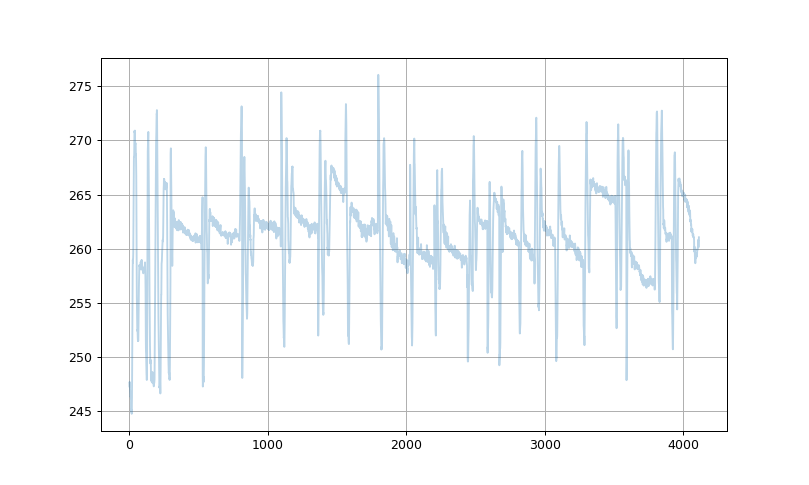

In [24]:
plt.figure(figsize = (10,6))

plt.grid()



plt.plot(frame_nums, Total_Frames_Centroids[:,1], alpha = 0.3)

plt.scatter(frame_nums[breath_hold_frame_mask], Total_Frames_Centroids[:,1][breath_hold_frame_mask])

In [25]:
# for patients 1 and 6!

with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'rb') as handle:
    breath_hold_frames_split = pickle.load(handle)


<IPython.core.display.Javascript object>


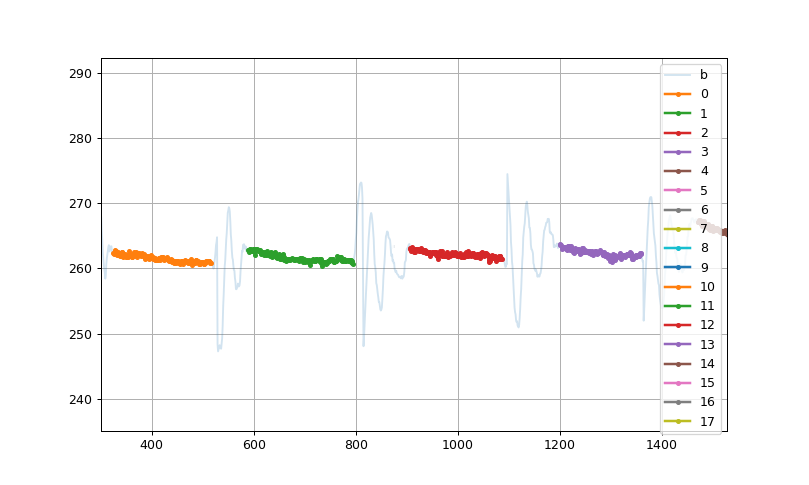

In [29]:
plt.figure(figsize = (10,6))
plt.grid()



plt.plot(frame_nums, Total_Frames_Centroids[:,1] , alpha = 0.2)


for breath_hold in range(0 , len(breath_hold_frames_split)):
    
    #print(breath_hold)
    
    plt.plot( breath_hold_frames_split[breath_hold], [ Total_Frames_Centroids_Original[:,1][frame] for frame in  breath_hold_frames_split[breath_hold]]
    , linewidth = 2, marker = '.')
    


plt.legend(['b' ] + [str(breath_hold) for breath_hold in range(0 , len(breath_hold_frames_split)) ])




#now_this_breath_hold_y_centroids = [ Total_Frames_Centroids_Original[:,1][frame] for frame in  breath_hold_frames_split[breath_hold_number]]
    

In [27]:

def closest_frame(frame , frame_nums):
    
    distances = abs(frame_nums - frame)
    
    min_distance = np.min(distances)
    
    where = np.where( distances == min_distance )[0][0]
    
    return where


#### Remove breath hold

In [403]:
breath_hold_frames_split.pop(17)


IndexError: pop index out of range

#### Stitch breath holds


Just stitching together any breathold components that clearly should be together - don't worry about outiers as these are dealt with in the analysising cine script

In [588]:

number = 35
breath_hold_frames_split[number] = list(breath_hold_frames_split[number]) + list(breath_hold_frames_split[number + 1]) 

breath_hold_frames_split.pop(number+1)

breath_hold_frames_split[number] = np.array(breath_hold_frames_split[number])


#### Add breath hold

In [411]:
breath_hold_number = 21

min_frame = 3233

max_frame = 3350

    
min_frame_index = closest_frame(min_frame, frame_nums)


max_frame_index = closest_frame(max_frame , frame_nums)


new_breath_hold = frame_nums[ min_frame_index: max_frame_index]



breath_hold_frames_split.insert( breath_hold_number , new_breath_hold )



#### Extend/Trim breath hold - START

In [28]:
breath_hold_number =2

new_min_frame = 906

new_min_frame_index = closest_frame(new_min_frame, frame_nums)


max_frame = breath_hold_frames_split[breath_hold_number][-1]

max_frame_index = closest_frame(max_frame , frame_nums)


extended_breath_hold = frame_nums[ new_min_frame_index : max_frame_index]


breath_hold_frames_split[breath_hold_number] = extended_breath_hold



#### Extend/Trim breath hold - END

In [81]:
breath_hold_number  =13

new_max_frame  = 2819

new_max_frame_index = closest_frame(new_max_frame, frame_nums)


min_frame = breath_hold_frames_split[breath_hold_number][0]

min_frame_index = closest_frame(min_frame , frame_nums)


extended_breath_hold = frame_nums[ min_frame_index : new_max_frame_index]


breath_hold_frames_split[breath_hold_number] = extended_breath_hold


#### Save corrected breath_hold_frames_split

In [30]:
print(len(breath_hold_frames_split))


# import os

# os.makedirs('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds')


with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'wb') as handle:
    pickle.dump(breath_hold_frames_split, handle, protocol=pickle.HIGHEST_PROTOCOL)

18


<IPython.core.display.Javascript object>


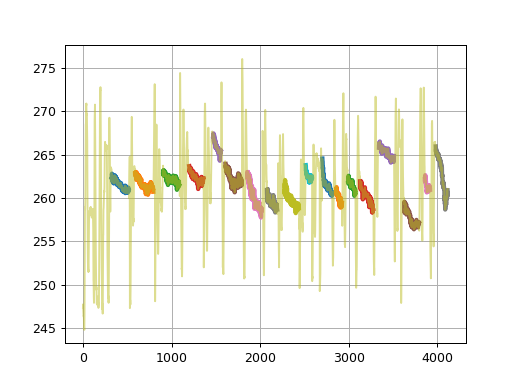

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [31]:
#Calculate the centroid y positions within each period of breath-hold

breath_hold_y_centroids_split = []

breath_hold_x_centroids_split = []

breath_hold_areas_split = []

plt.figure()

for breath_hold_number in range(0, len(breath_hold_frames_split)):
    
    print(breath_hold_number)
    

    
    #breath_hold_y_centroid = [ Total_Frames_Centroids_Original[:,1][frame] for frame in  breath_hold_frames_split[breath_hold_number]]
    
    now_this_breath_hold_y_centroids = [ Total_Frames_Centroids_Original[:,1][frame] for frame in  breath_hold_frames_split[breath_hold_number]]
    
    #print(len(now_this_breath_hold_y_centroids))
    
    this_breath_hold_x_centroids = [ Total_Frames_Centroids_Original[:,0][frame] for frame in  breath_hold_frames_split[breath_hold_number]]
    
    this_breath_hold_areas = [ Total_Areas_Original[frame] for frame in breath_hold_frames_split[breath_hold_number]] 
    
    
    
    breath_hold_y_centroids_split.append(now_this_breath_hold_y_centroids)
    
    breath_hold_x_centroids_split.append(this_breath_hold_x_centroids)
    
    breath_hold_areas_split.append(this_breath_hold_areas)



    #plt.plot( breath_hold_frames_split[breath_hold_number]*0.125, np.array(breath_hold_y_centroid)*pixel_size)
    
    plt.plot( breath_hold_frames_split[breath_hold_number], np.array(now_this_breath_hold_y_centroids), linewidth = 3.5)#, color = 'red')
    
    
plt.grid()

#plt.plot(frame_nums*0.125, Total_Frames_Centroids[:,1]*pixel_size)

#plt.scatter(frame_nums[breath_hold_frame_mask], Total_Frames_Centroids[:,1][breath_hold_frame_mask], color = 'lightgreen')

plt.plot(frame_nums, Total_Frames_Centroids[:,1], alpha = 0.5)



#print(len(breath_hold_y_centroids_split))

with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_y_centroids_split.pickle', 'wb') as handle:
    pickle.dump(breath_hold_y_centroids_split, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_x_centroids_split.pickle', 'wb') as handle:
    pickle.dump(breath_hold_x_centroids_split, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_areas_split.pickle', 'wb') as handle:
    pickle.dump(breath_hold_areas_split, handle, protocol=pickle.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


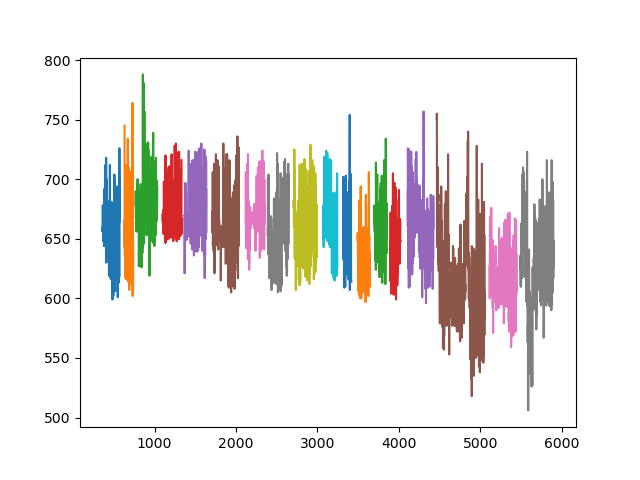

In [838]:
plt.figure()


for i in range( 0 , len(breath_hold_areas_split)):
    

    plt.plot(breath_hold_frames_split[i] , breath_hold_areas_split[i])

#### Smoothing each period of breath-hold

In [337]:
# plt.figure()

# plt.grid()

# for breath_hold_number in range(0,len(breath_hold_frame_jumps) - 1):


#     breath_hold_y_centroid_avg = [breath_holds_y_centroid[breath_hold_number][0]] + list(moving_average(breath_holds_y_centroid[breath_hold_number], 4)) + [breath_holds_y_centroid[breath_hold_number][-1]] 

#     breath_hold_frames_avg = [breath_hold_frames_split[breath_hold_number][0]] + list(moving_average(breath_hold_frames_split[breath_hold_number], 4)) + [breath_hold_frames_split[breath_hold_number][-1]]

#     plt.plot(np.array(breath_hold_frames_avg)*0.125, np.array(breath_hold_y_centroid_avg)*pixel_size)



In [338]:

# plt.figure()


# for breath_hold_number in range(0,len(breath_hold_frame_jumps) - 1):
   
    
#     y = np.array(breath_holds_y_centroid[breath_hold_number])*pixel_size


#     t = np.array(breath_hold_frames_split[breath_hold_number])*0.125


#     fit = np.polyfit(t,y,5)

#     #print(fit)

#     fitted = fit[0]*(t**5) + fit[1]*(t**4) + fit[2]*(t**3) + fit[3]*(t**2) + fit[4]*(t**1) + fit[5]
    
#     #velocity = np.gradient(fitted)


#     plt.plot(t,y, color = 'lightgreen')

#     plt.plot(t, fitted, color = 'red')
    
# plt.scatter(frame_nums*0.125, Total_Frames_Centroids[:,1]*pixel_size, alpha = 0.2)

#### Polynomial fit to each breath hold period

<IPython.core.display.Javascript object>


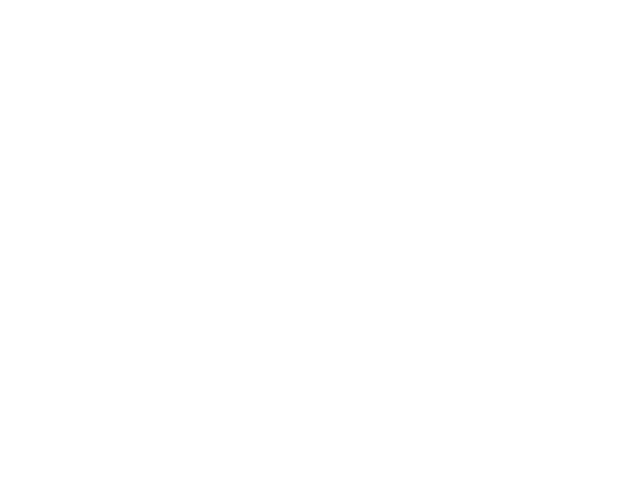

NameError: name 'breath_holds_y_centroid' is not defined

In [118]:
import scipy.signal

plt.figure()

breath_hold_numbers = []

breath_hold_durations = []

breath_hold_fits = []

breath_hold_times_split = []

for breath_hold_number in range(0,len(breath_hold_frame_jumps) - 1):




    y = np.array(breath_holds_y_centroid[breath_hold_number])*pixel_size
    
    x = np.array(breath_holds_x_centroid[breath_hold_number])*pixel_size
    
    area = np.array(breath_holds_x_centroid[breath_hold_number])

    t = np.array(breath_hold_frames_split[breath_hold_number])*(1/cine_fps)
    
    breath_hold_times_split.append(t)

    #x = np.array([ t,y])
    
    breath_hold_numbers.append(breath_hold_number)
    
    breath_hold_durations.append( np.max(t) - np.min(t))
    
    
    #print(len(t))
    
    #print(breath_hold_number)


    if len(t)%2 == 0:

        fit = scipy.signal.savgol_filter(y, len(t)-1, 7)
        
    else:
        
        fit = scipy.signal.savgol_filter(y, len(t), 7)

    
    breath_hold_fits.append(fit)


    plt.plot(t,y, color = 'lightgreen')

    plt.plot(t,fit, color = 'red')
    
plt.scatter(frame_nums*0.125, Total_Frames_Centroids[:,1]*pixel_size, alpha = 0.2)

plt.title('Breath hold centroid y coordinate')
plt.ylabel('y centroid (mm)')
plt.xlabel('time (s)')



plt.grid()

<IPython.core.display.Javascript object>


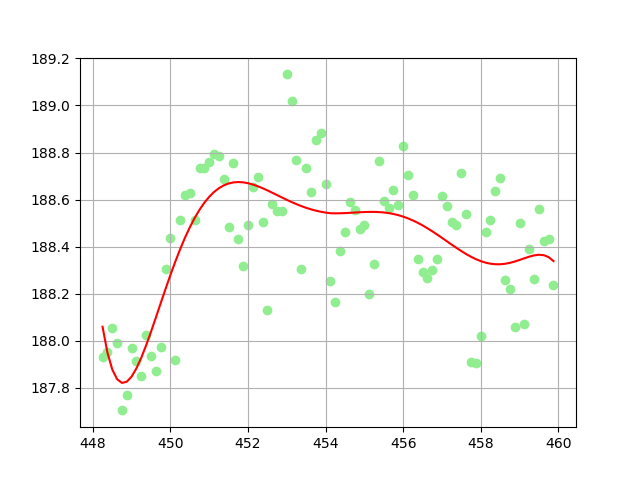

In [277]:
breath_hold_number = 13

plt.figure()

plt.plot(breath_hold_times_split[breath_hold_number], breath_hold_fits[breath_hold_number], color = 'red')

plt.scatter(breath_hold_times_split[breath_hold_number], np.array(breath_holds_y_centroid[breath_hold_number])*pixel_size  , color = 'lightgreen')

#plt.plot(breath_hold_frames_split[breath_hold_number], )

plt.grid()

<IPython.core.display.Javascript object>


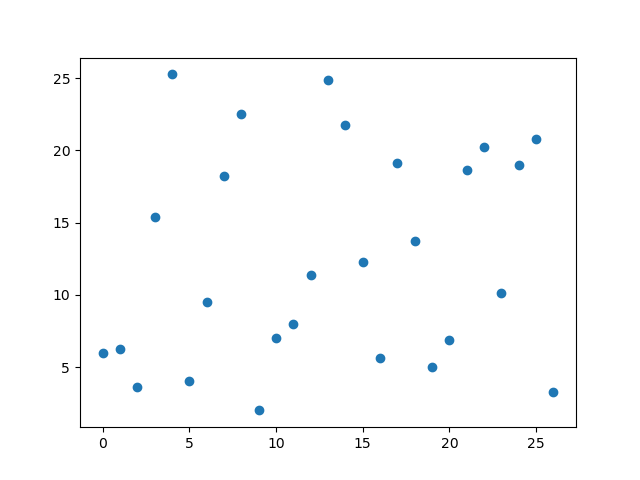

<IPython.core.display.Javascript object>


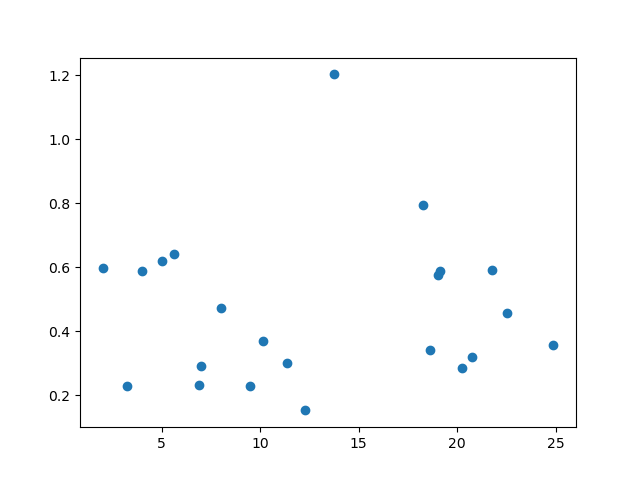

In [484]:
plt.figure()

plt.scatter(breath_hold_numbers, breath_hold_durations)


plt.figure()

plt.scatter(breath_hold_durations[5:], breath_hold_sds[5:])

## Include Areas and x coordinate too!!